## Import 라인

In [70]:
%matplotlib inline

import os
import numpy as np
import keras
import matplotlib.pyplot as plt 
from keras.utils.np_utils import to_categorical
from keras.models import Sequential, Model
from keras.layers import Input, Dense,Conv2D,Flatten,MaxPooling2D,\
                            AveragePooling2D,Dropout, Resizing, BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, \
                            LearningRateScheduler
from keras.optimizers import Adam , RMSprop 
from sklearn.model_selection import train_test_split
from keras import regularizers
from keras.datasets import cifar10

## LeNet-5 코드 찾아서 실습

In [44]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

x_train=x_train.reshape(-1,28,28,1)
x_test=x_test.reshape(-1,28,28,1)

x_train, x_val, y_train, y_val = train_test_split(x_train,y_train,test_size=0.2)

x_train=x_train/255.0
x_val=x_val/255.0
x_test=x_test/255.0

In [56]:
class LeNet(Sequential):
  def __init__(self, num_classes):
    """_summary_

    Args:
        num_classes (_type_): label의 답 개수
    """
    super().__init__()
    self.add(Conv2D(6,5,strides=1,activation='relu',input_shape=(28,28,1),padding='same'))
    self.add(AveragePooling2D(2,strides=2))
    self.add(Conv2D(16,5,strides=1,activation='relu'))
    self.add(AveragePooling2D(2,strides=2))
    self.add(Conv2D(120,5,strides=1,activation='relu'))
    self.add(Flatten())
    self.add(Dense(84,activation='tanh'))
    self.add(Dense(num_classes,activation='softmax'))
    self.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics='accuracy')

In [57]:
model=LeNet(10)

model.summary()

Model: "le_net_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d_14 (Avera  (None, 14, 14, 6)        0         
 gePooling2D)                                                    
                                                                 
 conv2d_22 (Conv2D)          (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_15 (Avera  (None, 5, 5, 16)         0         
 gePooling2D)                                                    
                                                                 
 conv2d_23 (Conv2D)          (None, 1, 1, 120)         48120     
                                                                 
 flatten_7 (Flatten)         (None, 120)               0  

In [58]:
def makedir(path):
    try:
        os.makedirs(path)
    except OSError:
        if not os.path.isdir(path):
            raise

In [59]:
early_stopping= EarlyStopping(monitor='val_loss', patience=3)

checkpoint = ModelCheckpoint(filepath='./LeNet-5/best_model_weights.h5', # 저장할 경로
                                    monitor='val_loss',                                         # 모니터링 기준
                                    save_best_only=True)

callbacks = {
    'early_stopping' : early_stopping, 'model_checkpoint':checkpoint
}

In [60]:
history=model.fit(x_train, y_train,
          epochs=20,
          validation_data=(x_val, y_val),
          callbacks=callbacks
          )

Epoch 1/20
1500/1500 [==============================] - 12s 8ms/step - loss: 0.2182 - accuracy: 0.9347 - val_loss: 0.0898 - val_accuracy: 0.9711
Epoch 2/20
1500/1500 [==============================] - 18s 12ms/step - loss: 0.0691 - accuracy: 0.9786 - val_loss: 0.0712 - val_accuracy: 0.9778
Epoch 3/20
1500/1500 [==============================] - 18s 12ms/step - loss: 0.0505 - accuracy: 0.9838 - val_loss: 0.0586 - val_accuracy: 0.9822
Epoch 4/20
1500/1500 [==============================] - 21s 14ms/step - loss: 0.0384 - accuracy: 0.9876 - val_loss: 0.0560 - val_accuracy: 0.9833
Epoch 5/20
1500/1500 [==============================] - 22s 14ms/step - loss: 0.0315 - accuracy: 0.9897 - val_loss: 0.0623 - val_accuracy: 0.9824
Epoch 6/20
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0257 - accuracy: 0.9914 - val_loss: 0.0444 - val_accuracy: 0.9876
Epoch 7/20
1500/1500 [==============================] - 26s 17ms/step - loss: 0.0207 - accuracy: 0.9931 - val_loss: 0.0508 - v

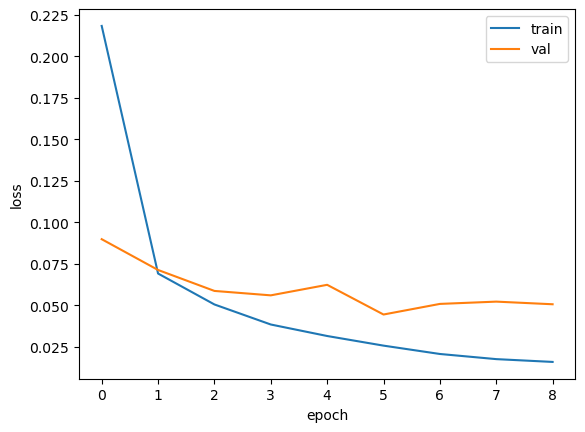

In [61]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

## AlexNet 실습

In [75]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [76]:
X_train.shape, y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [77]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [78]:
model = Sequential()
model.add(Resizing(227,227, interpolation='bilinear', input_shape=X_train.shape[1:]))
model.add(Conv2D(96, (11,11), strides=(4,4), activation='relu', padding='same'))
model.add(MaxPooling2D((3,3), strides=2))
model.add(BatchNormalization())

model.add(Conv2D(256, (5,5), strides=1, activation='relu', padding='same'))
model.add(MaxPooling2D((2,2), strides=2))
model.add(BatchNormalization())

model.add(Conv2D(384, (3,3), strides=1, activation='relu', padding='same'))
model.add(Conv2D(384, (3,3), strides=1, activation='relu', padding='same'))
model.add(Conv2D(384, (3,3), strides=1, activation='relu', padding='same'))
model.add(MaxPooling2D((3,3), strides=2))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [79]:
early_stopping= EarlyStopping(monitor='val_loss', patience=3)

checkpoint = ModelCheckpoint(filepath='./Alexnet/best_model_weights.h5', # 저장할 경로
                                    monitor='val_loss',                                         # 모니터링 기준
                                    save_best_only=True)

callbacks = {
    'early_stopping' : early_stopping, 'model_checkpoint':checkpoint
}

In [80]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')

In [83]:
history = model.fit(X_train, y_train, epochs=2, batch_size=256, validation_data=(X_test, y_test), callbacks=callbacks, verbose=1)

Epoch 1/2
196/196 [==============================] - 2240s 11s/step - loss: 1.5100 - accuracy: 0.4486 - val_loss: 2.4792 - val_accuracy: 0.2905
Epoch 2/2
196/196 [==============================] - 2157s 11s/step - loss: 1.1894 - accuracy: 0.5774 - val_loss: 1.4479 - val_accuracy: 0.4907


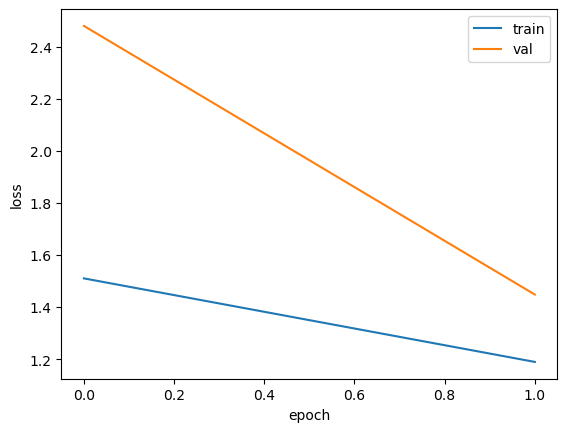

In [84]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()